In [5]:
import pandas as pd
import numpy as np

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

In [7]:
import os

### load data

In [8]:
main_folder = r"C:\Users\Alexandre Boulenger\santransakt_main"
data_folder = os.path.join(main_folder, 'data')

In [9]:
train = pd.read_csv(os.path.join(data_folder,"train.csv"))
test = pd.read_csv(os.path.join(data_folder,"test.csv"))

### prep data

In [10]:
test['target'] = '_'#np.?
cols = test.columns[:-1].tolist()
cols = [cols[0], 'target']+cols[1:]
test = test.loc[:,cols]

In [11]:
traintest = pd.concat([train, test])
traintest.reset_index(drop=True, inplace=True)
traintest['set'] = 'test'
traintest.loc[train.index,'set'] = 'train'
traintest.set.value_counts()

test     200000
train    200000
Name: set, dtype: int64

In [12]:
X_tr = train.drop(columns=['target', 'ID_code']).copy()
X_te = test.drop(columns=['target', 'ID_code']).copy()
X = traintest.drop(columns=['target', 'ID_code']).copy()

In [13]:
y_tr = train.target.copy()
y = traintest.target.copy()

### conduct EDA

count unique values

In [61]:
unicount_f = lambda x:x.unique().shape[0]

In [62]:
train_unicount = train.apply(unicount_f).reset_index().rename(columns={0:"unicount", 'index':'varr'})
test_unicount = test.apply(unicount_f).reset_index().rename(columns={0:"unicount", 'index':'varr'})

In [63]:
train_unicount['sett'] = 'train'
test_unicount['sett'] = 'test'
unicount = train_unicount.append(test_unicount)

In [79]:
#unicount.loc[~unicount.varr.isin(['ID_code','target'])]

In [80]:
order_var = train_unicount.sort_values('unicount', ascending=False).varr.tolist()

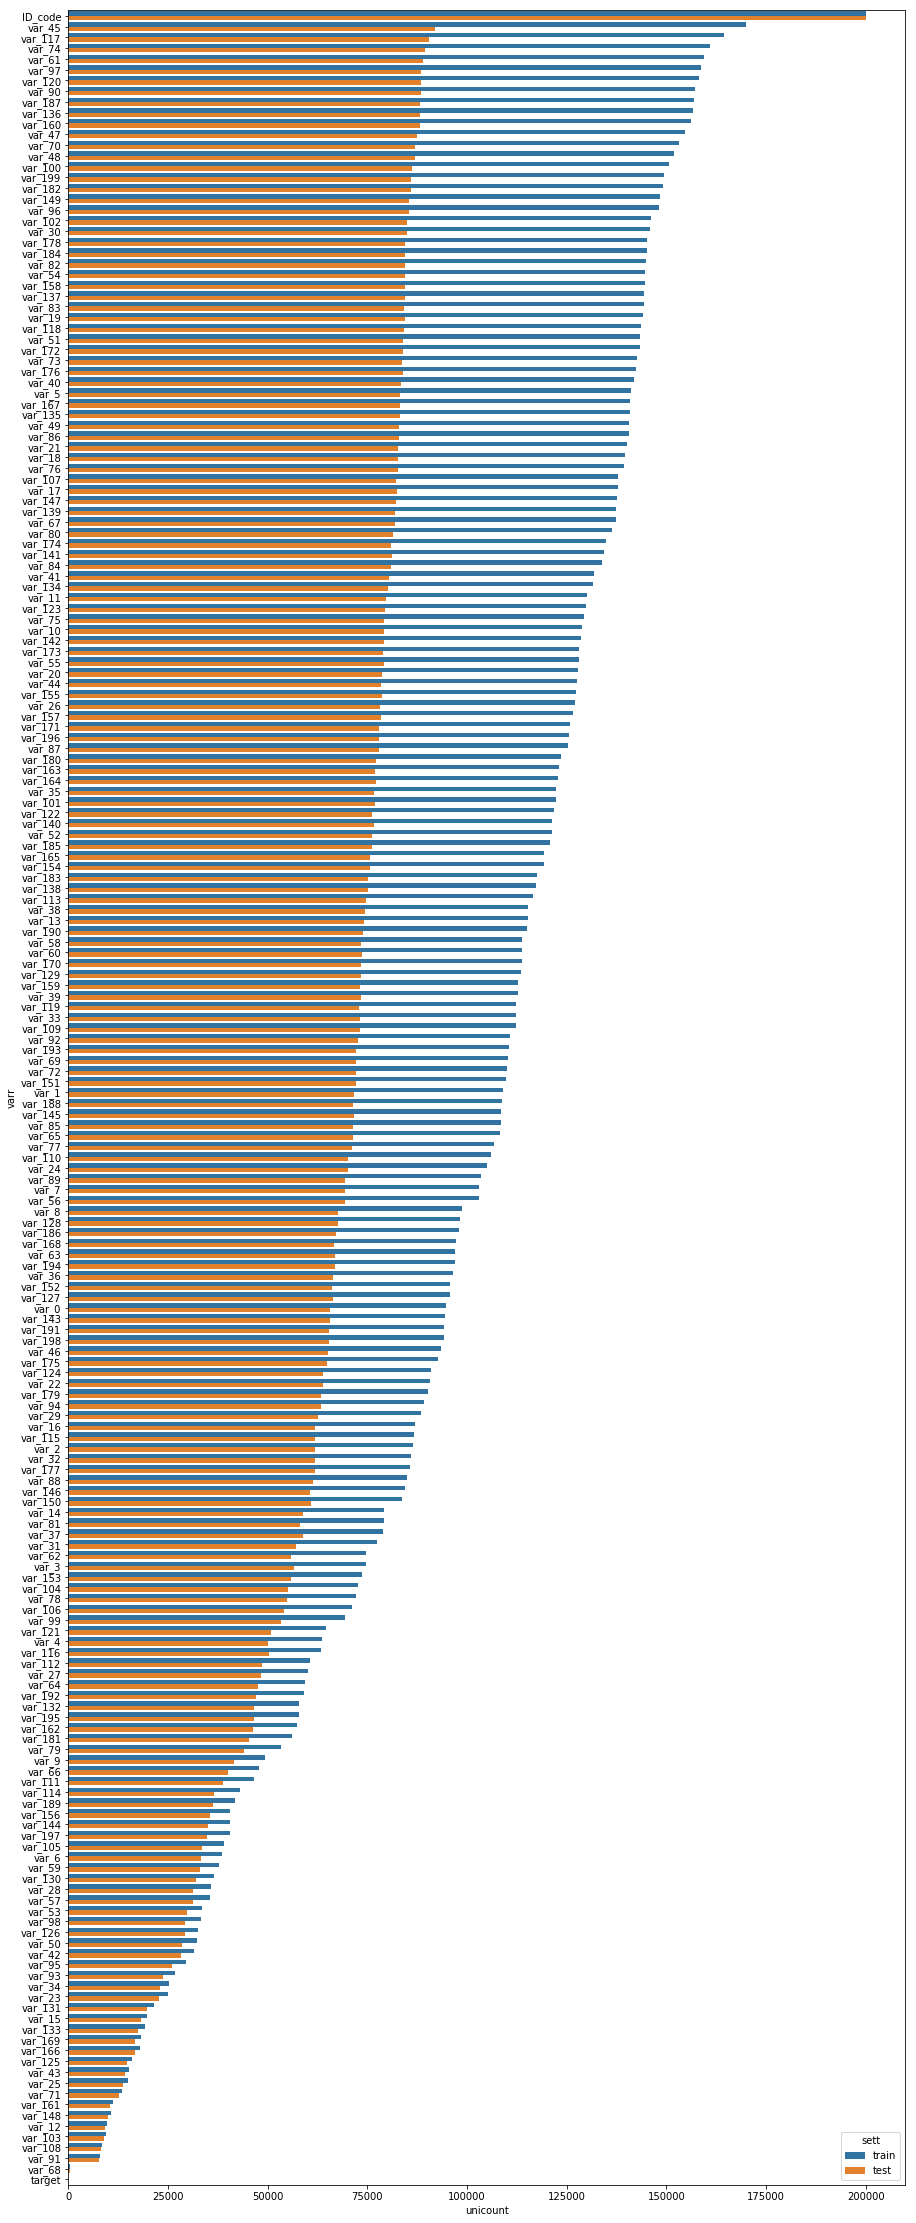

In [83]:
rcParams['figure.figsize'] = 15, 40
ax = sns.barplot(x="unicount", y="varr", data=unicount, hue='sett', order=order_var)

# split fake and test

#### for each feature, count values that repeat more than x times

In [174]:
thresh = [10, 15, 20]
columns = train.columns[2:]
v_counts_ab_thresh = {}

for th in thresh:
    v_counts_ab_thresh[th] = pd.DataFrame(index=columns, columns=['ab_thresh_train','ab_thresh_test'])
    
for col in columns:
    
    v_counts_tr = train.loc[:,col].value_counts()
    v_counts_te = test.loc[:,col].value_counts()
    
    for th in thresh:
        
        # train
        idx = v_counts_tr >= th
        v_counts_ab_thresh[th].loc[col,'ab_thresh_train'] = sum(idx)
        
        # test
        idx = v_counts_te >= th
        v_counts_ab_thresh[th].loc[col,'ab_thresh_test'] = sum(idx)

In [175]:
v_counts_ab_thresh[10]

,ab_thresh_train,ab_thresh_test
var_0,17,825
var_1,4,475
var_2,55,1126
var_3,97,1506
var_4,371,2439
var_5,0,124
var_6,4936,6421
var_7,3,540
var_8,12,680
var_9,1363,3946


#### identify rows part of repeated values (10+ times) for more than 1 feature

In [166]:
th = 10
columns = train.columns[2:]
obs_w_rep_vals = pd.DataFrame(index=train.index, columns=columns, data=np.nan)

for col in columns:
    
    v_counts_tr = train.loc[:,col].value_counts()
    
    idx = v_counts_tr >= th
    repeating_vals = v_counts_tr.loc[idx].index.tolist()
    
    idx2 = train.loc[:,col].isin(repeating_vals)
    obs_w_rep_vals.loc[:, col] = idx2#train.loc[idx2, 'ID_code']

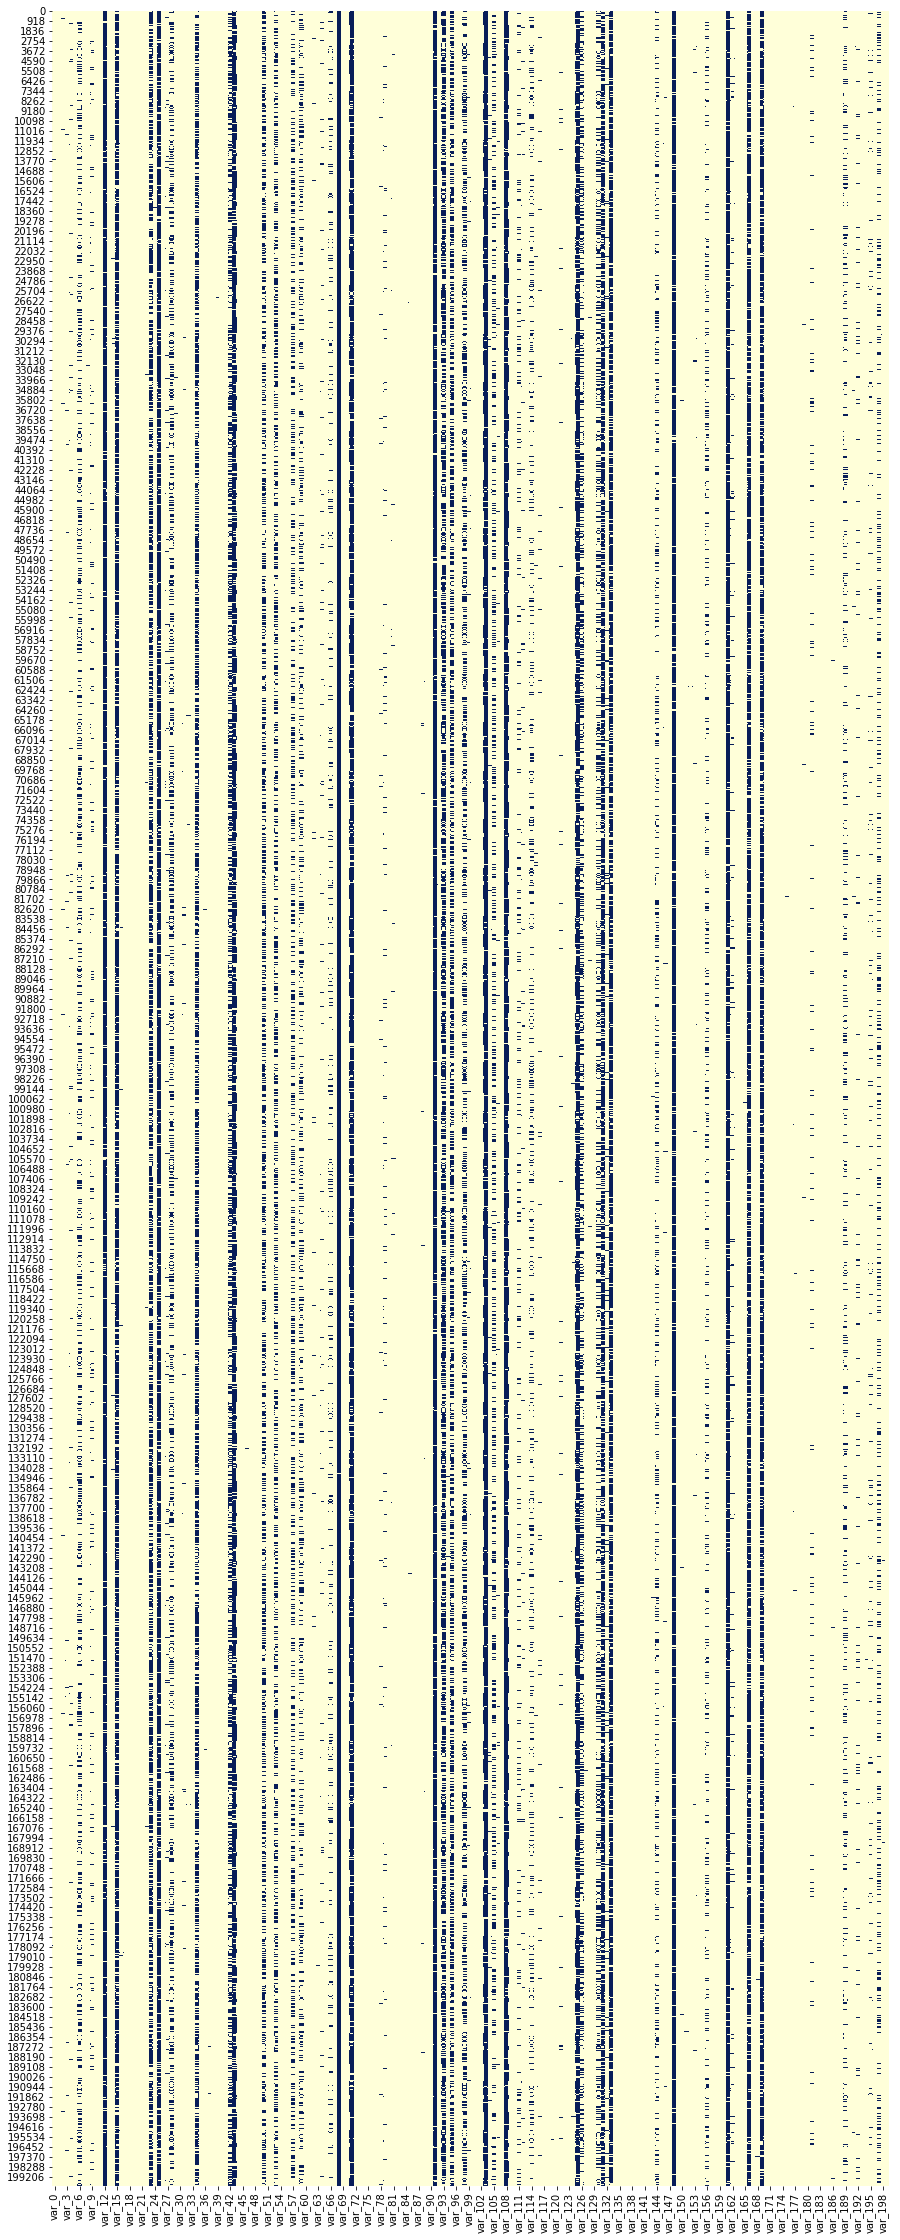

In [168]:
ax = sns.heatmap(obs_w_rep_vals, cmap="YlGnBu", cbar=False)

#### for each feature, count # rows that show a value repeating more than 10 times

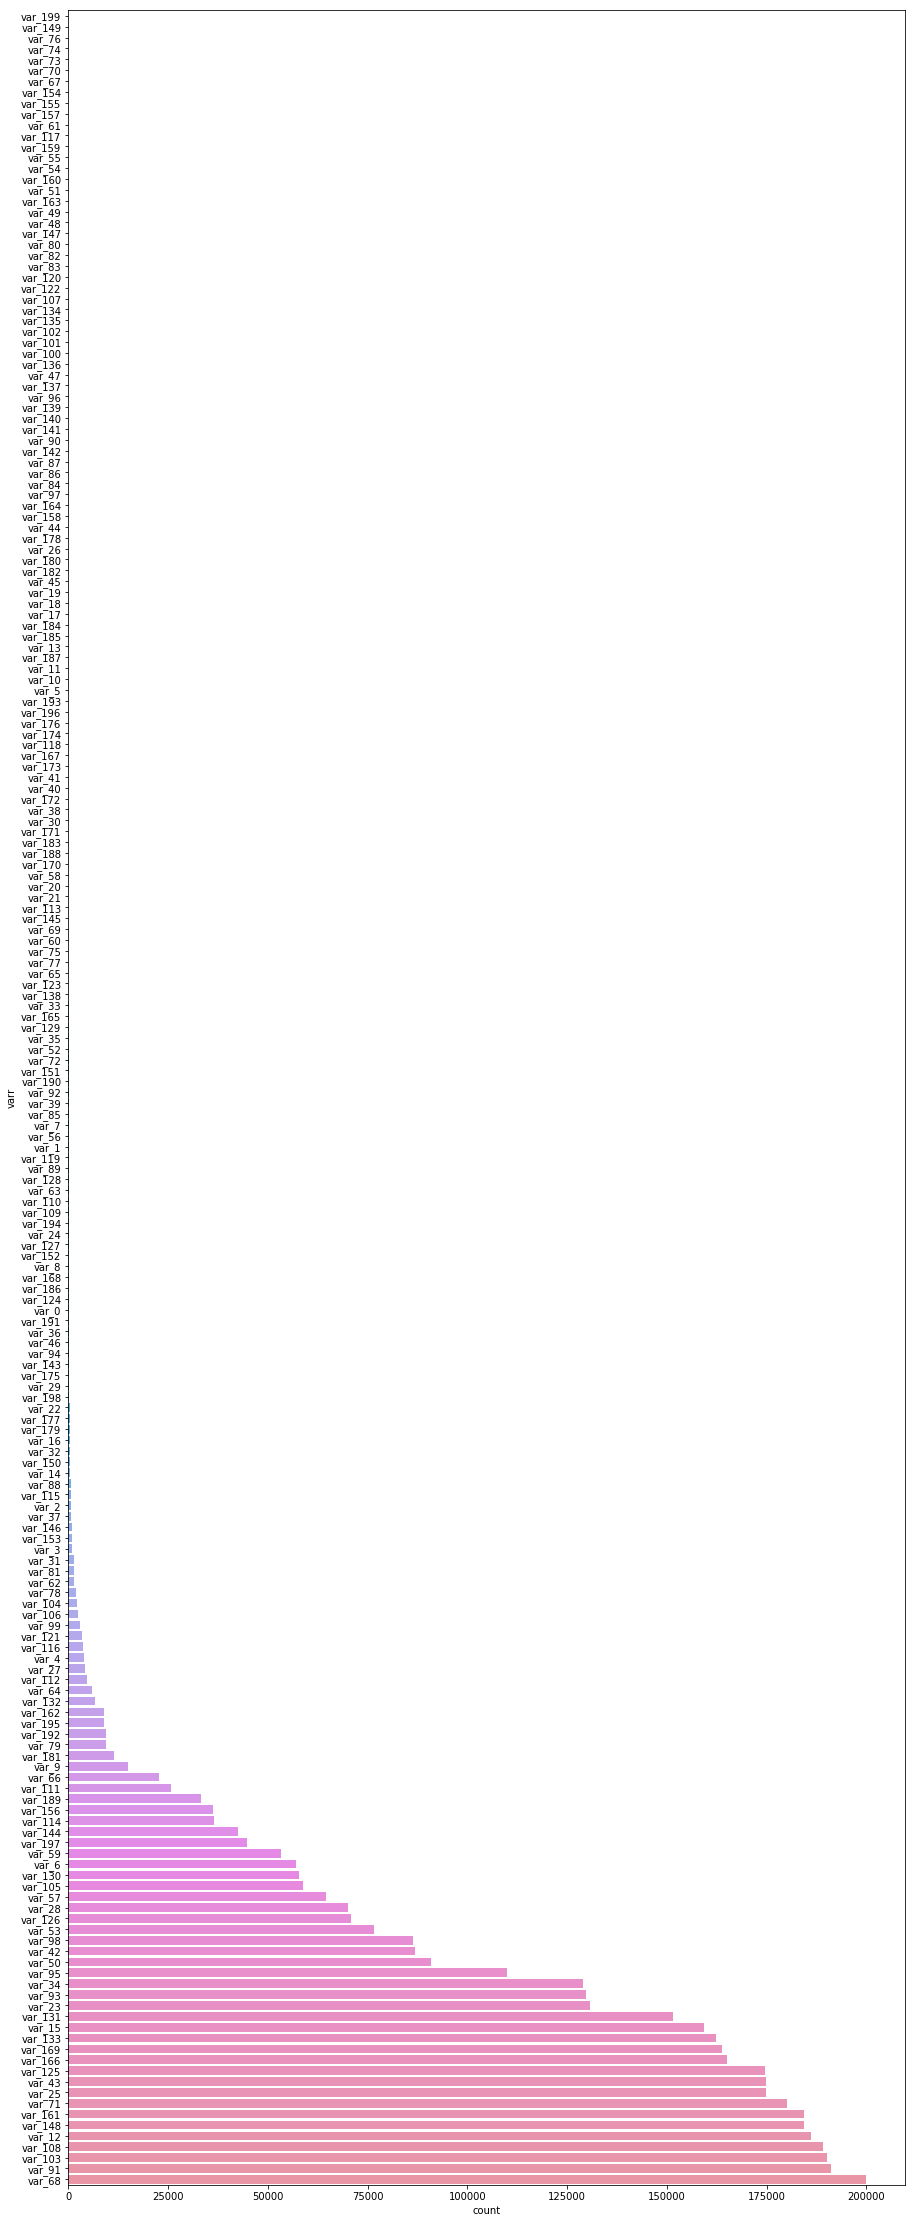

In [196]:
count_repeating_vals = obs_w_rep_vals.sum().reset_index().rename(columns={0:"count", 'index':'varr'}).sort_values('count', ascending=True)
rcParams['figure.figsize'] = 15, 40
ax = sns.barplot(x="count", y="varr", data=count_repeating_vals)

#### var 68

2 years of data? number of business days?

In [182]:
len(train.var_68.unique())/2

225.5